# Proyek Akhir: Menyelesaikan Permasalahan institusi pendidikan perguruan

- Nama: Fazlu Rachman
- Email: fazrlu9575gmail.com
- Id Dicoding: A429YBf167

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

### Menyiapkan data yang akan diguankan

In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/dataset/data.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Understanding
Tahap ini bertujuan untuk memahami karakteristik dataset melalui eksplorasi data.

### Menampilkan jumlah baris dan kolom pada dataset

In [ ]:
df.shape

(4424, 37)

### Menampilkan informasi tentang tipe data setiap kolom, jumlah data non-null, dan penggunaan memori

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Menampilkan statistik deskriptif seperti mean, standar deviasi, minimum, maksimum, dan kuartil untuk kolom numerik

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,4.706600,0.137658,0.541817,6.232143,8.063291,4.435805,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,3.094238,0.690880,1.918546,2.195951,3.947951,3.014764,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,3.000000,0.000000,0.000000,5.000000,6.000000,2.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,5.000000,0.000000,0.000000,6.000000,8.000000,5.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,6.000000,0.000000,0.000000,7.000000,10.000000,6.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,26.000000,12.000000,19.000000,23.000000,33.000000,20.000000,12.000000,16.200000,3.700000,3.510000


### Menampilkan jumlah baris duplikat

In [ ]:
df.duplicated().sum()

np.int64(0)

### Menghitung jumlah missing value pada setiap kolom

In [ ]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


### Visualisasi Data

####  Visualisasi Korelasi antar Fitur Numerik

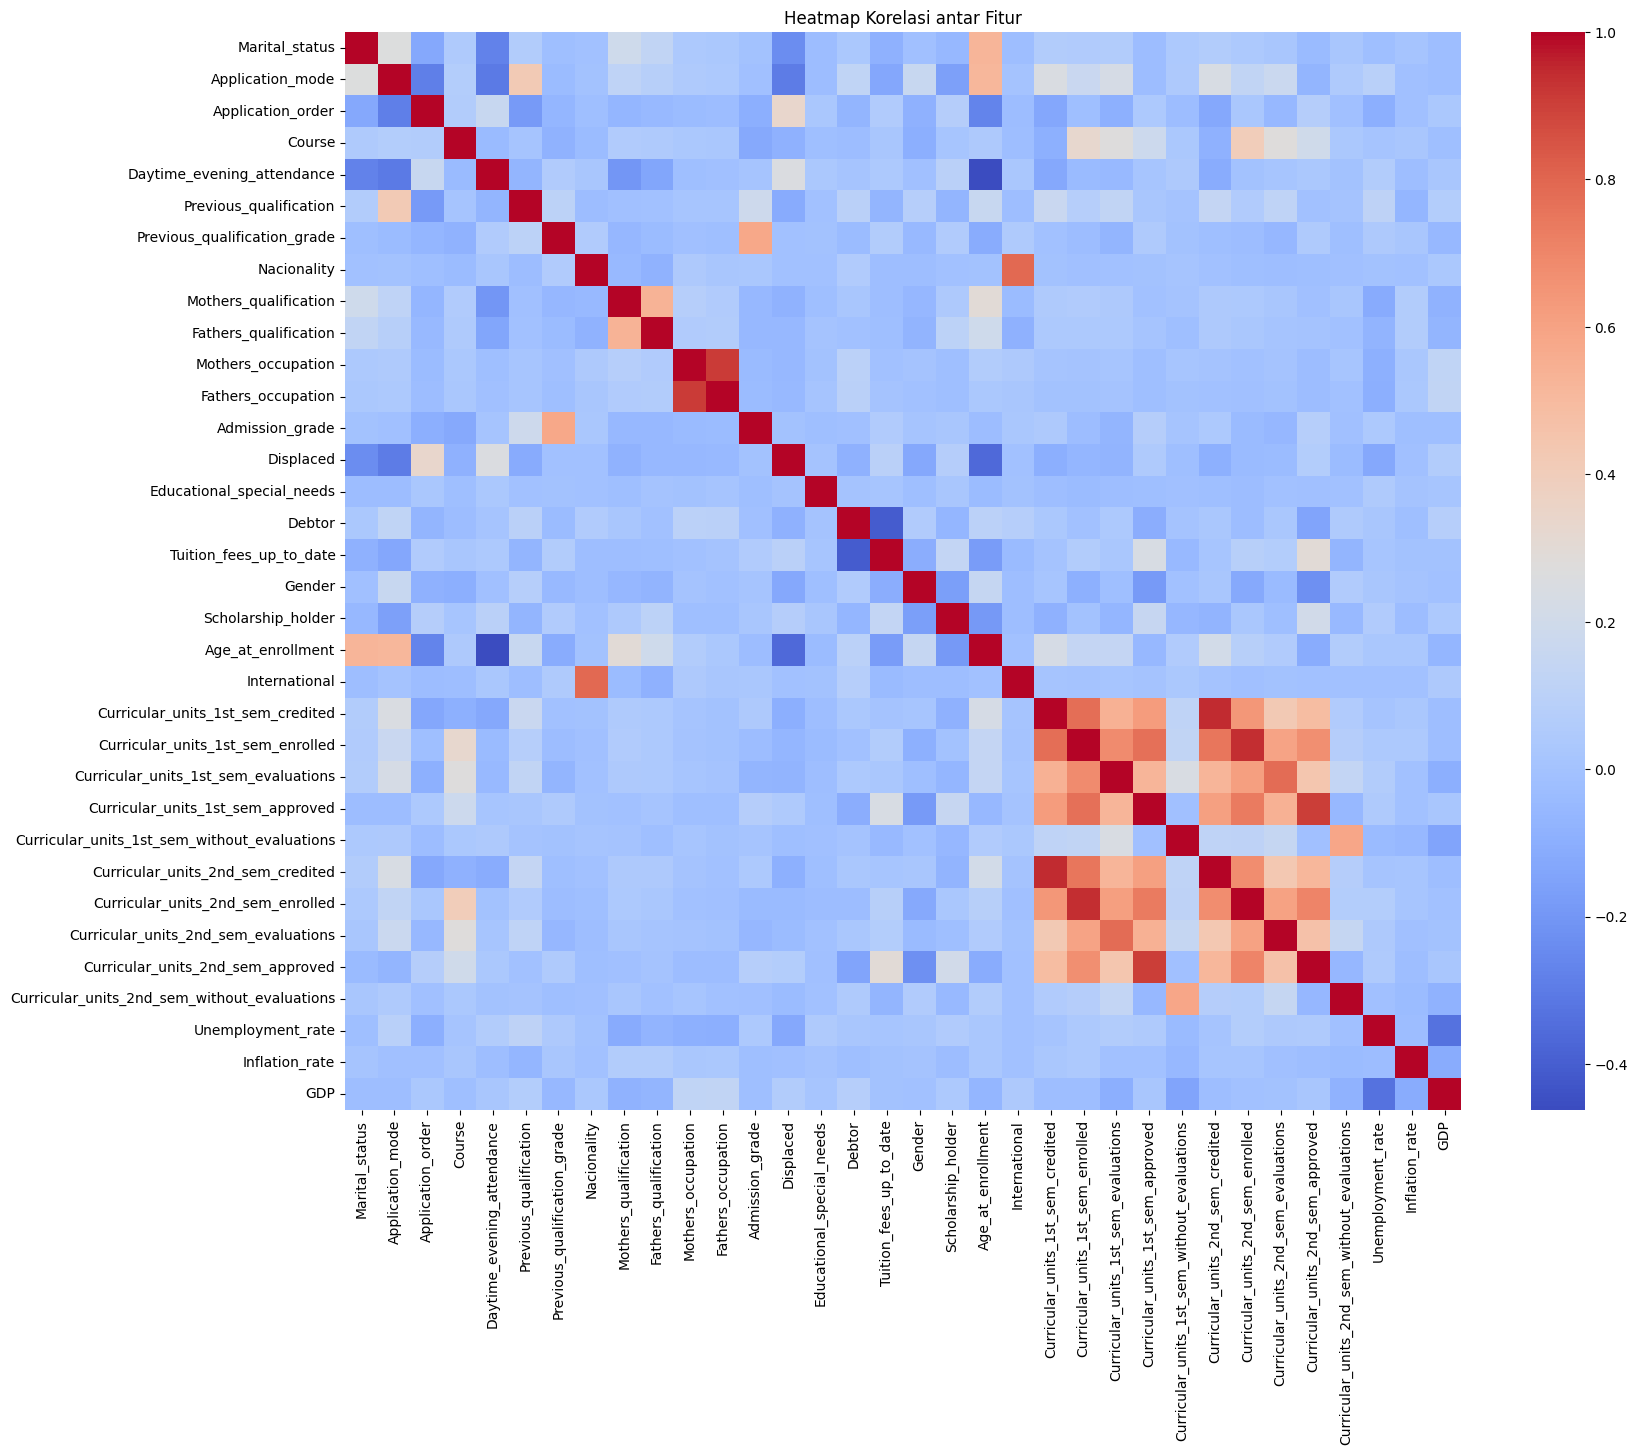

In [ ]:
# Korelasi antar semua fitur numerik
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Heatmap Korelasi antar Fitur")
plt.show()


#### Distribusi Nilai Fitur Penting (Histogram + KDE)

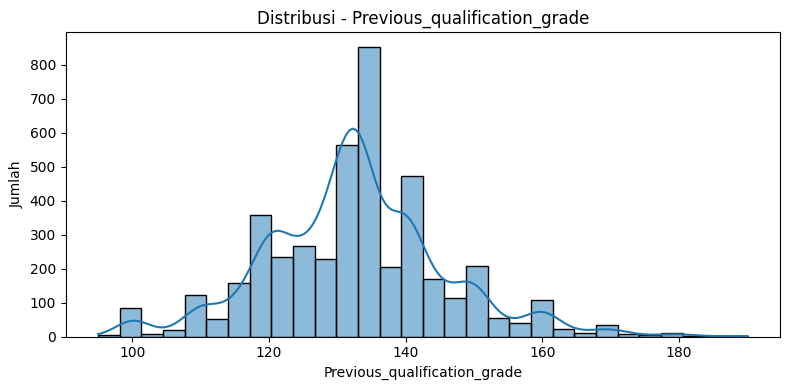

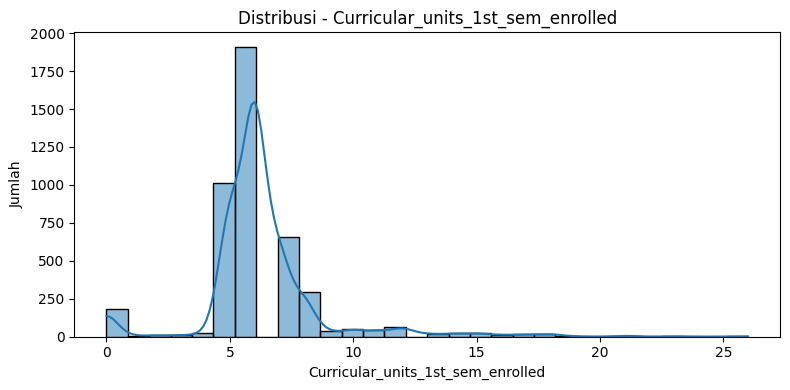

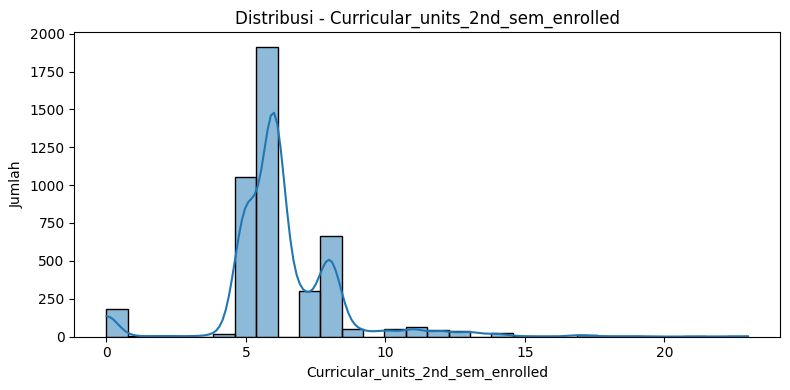

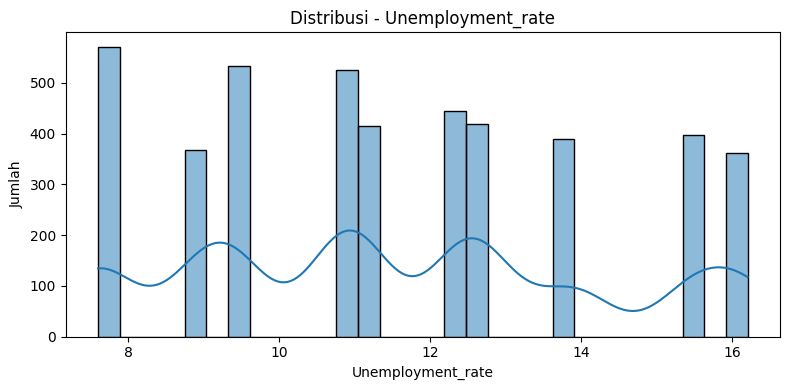

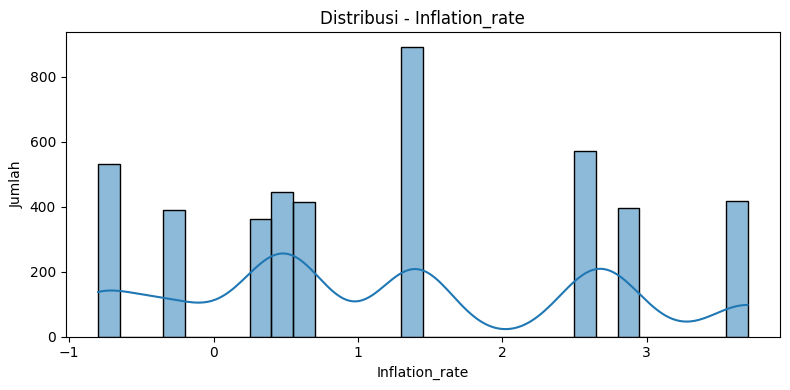

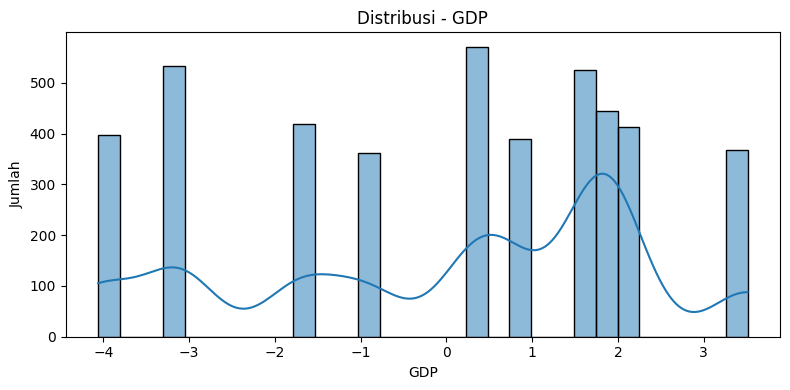

In [ ]:
features = [
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_2nd_sem_enrolled',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

for col in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi - {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()


#### Deteksi Outlier dengan Boxplot

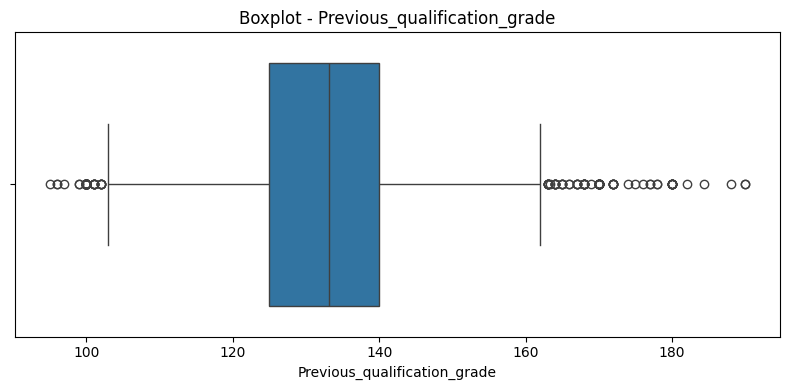

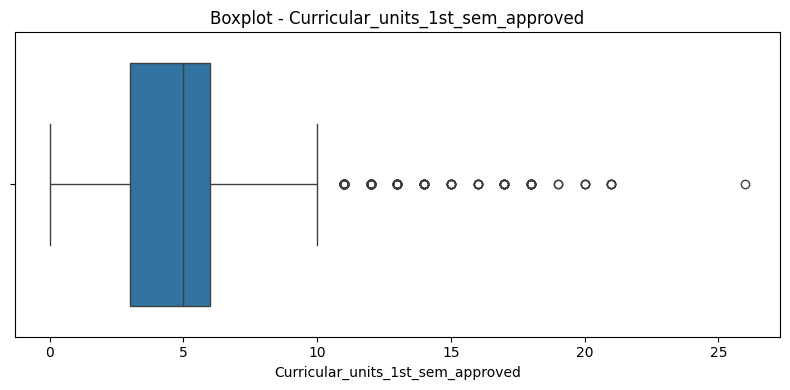

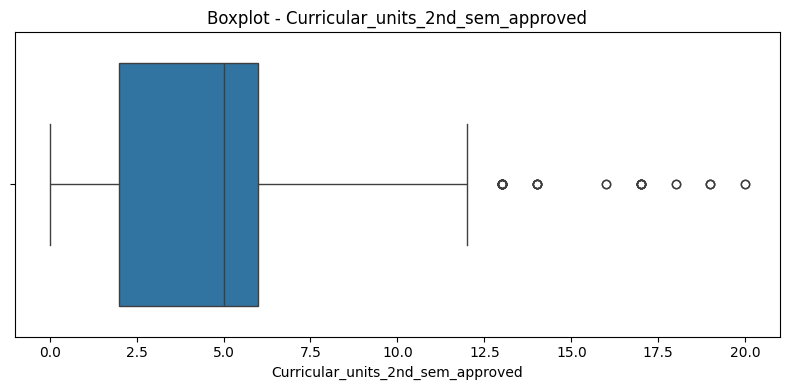

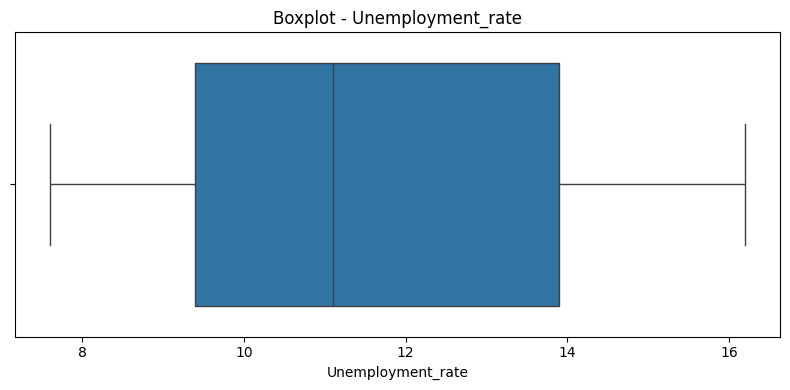

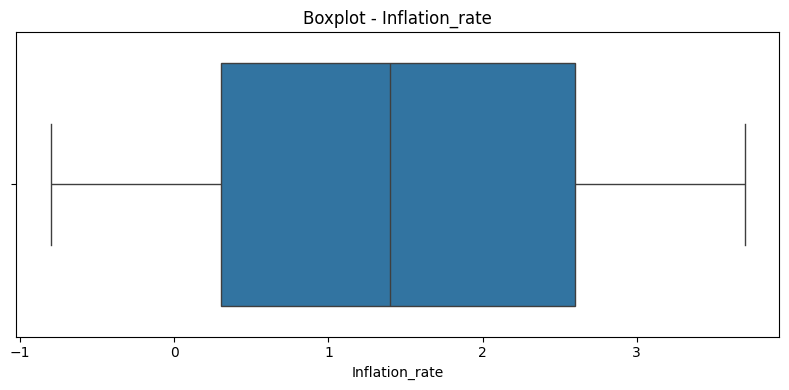

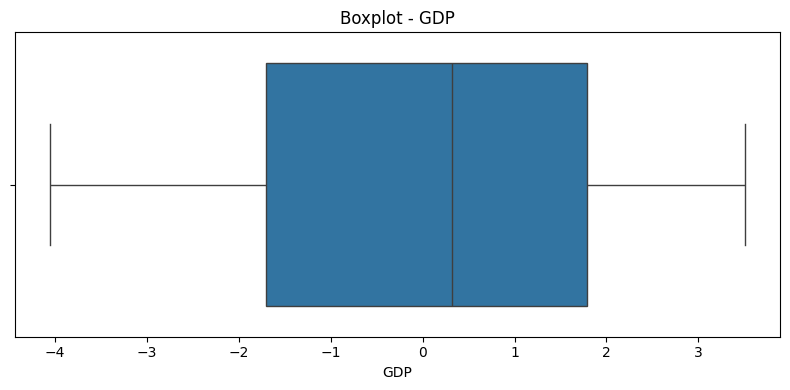

In [ ]:
boxplot_cols = [
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_approved',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

for col in boxplot_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


#### Visualisasi Pairplot (Hubungan antar Fitur)

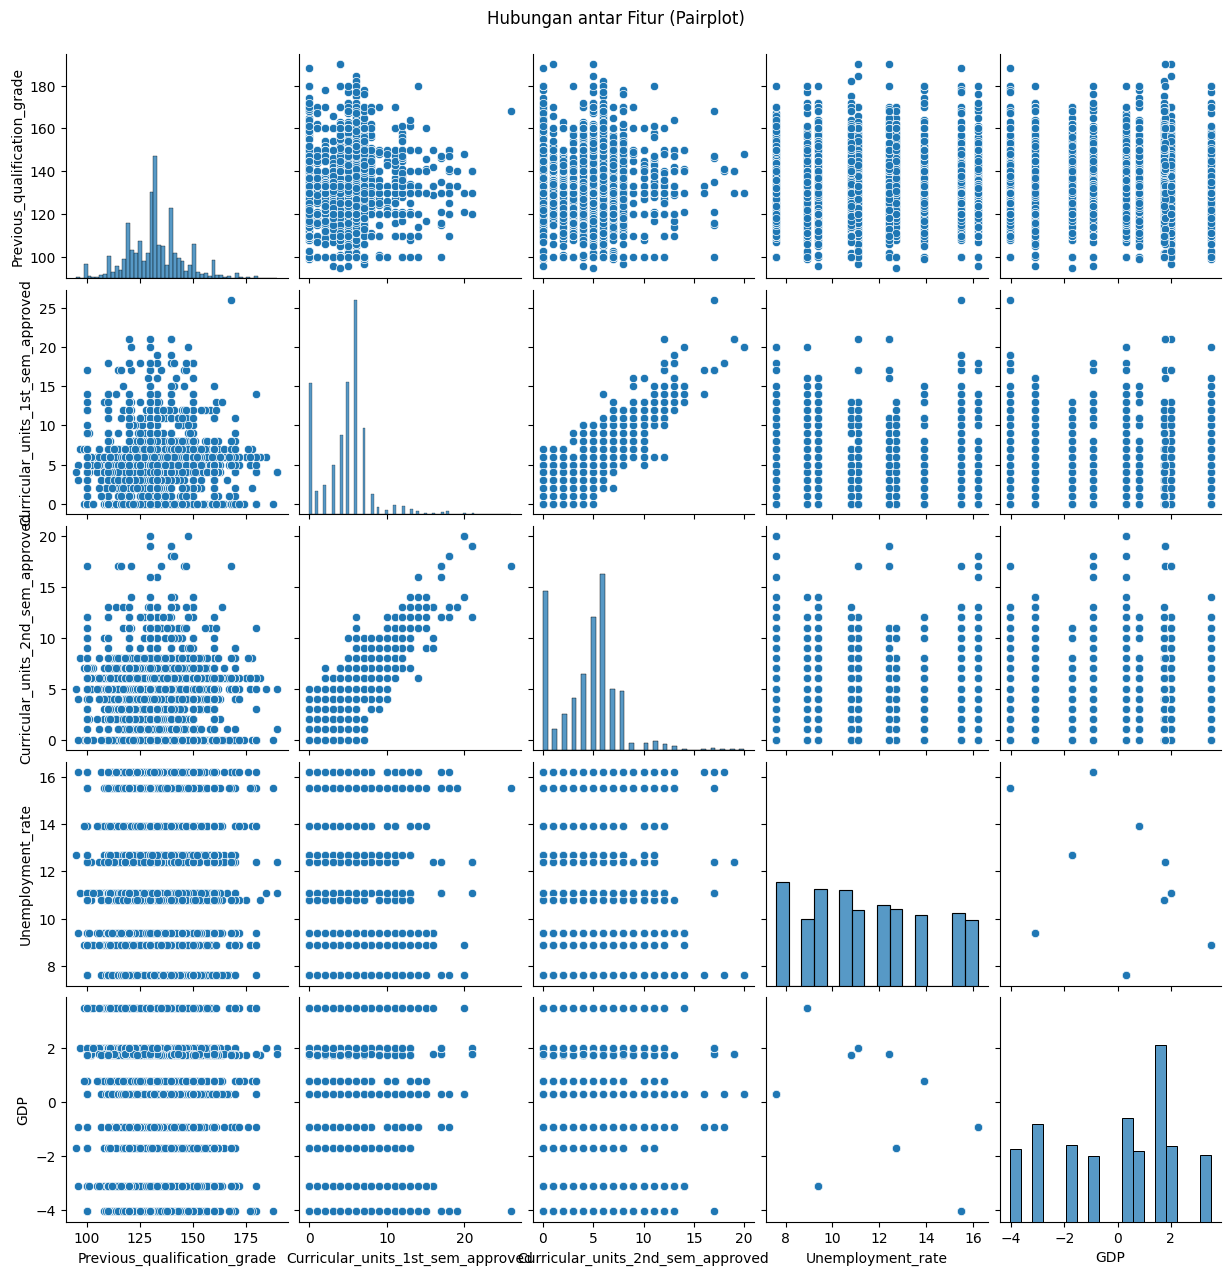

In [ ]:
# Pilih subset fitur yang representatif untuk melihat hubungan
subset = [
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_approved',
    'Unemployment_rate',
    'GDP'
]

sns.pairplot(df[subset])
plt.suptitle("Hubungan antar Fitur (Pairplot)", y=1.02)
plt.show()


## Data Preparation / Preprocessing
Mempersiapkan data untuk proses modeling.

### Penanganan Missing Value

In [ ]:
# Tidak ada missing value pada dataset
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment 

### Pemetaan Kolom Target (Status) Menjadi Biner
Mengubah kolom 'Status' dari multikelas menjadi biner untuk klasifikasi dropout.

In [ ]:
# Memetakan kolom 'Status' menjadi biner (1 untuk Dropout, 0 untuk lainnya)
status_mapping = {'Dropout': 1, 'Graduate': 0, 'Enrolled': 0}
df['Status'] = df['Status'].map(status_mapping)

# Periksa kembali distribusi kelas setelah pemetaan
print("\nDistribusi kelas setelah pemetaan biner:")
print(df['Status'].value_counts())


Distribusi kelas setelah pemetaan biner:
Status
0    3003
1    1421
Name: count, dtype: int64


### Penanganan Nilai String yang Tidak Valid pada Kolom Numerik
Membersihkan nilai string yang tidak valid yang menyebabkan error sebelumnya.

In [ ]:
df.columns = df.columns.str.replace("'", "_").str.replace(" ", "_")

### Encoding Fitur Kategorikal

 **Alasan Pemilihan Metode Encoding:**

 Menggunakan One-Hot Encoding karena fitur kategorikal tidak memiliki urutan intrinsik, dan metode ini cocok untuk merepresentasikan setiap kategori sebagai fitur biner baru.


In [ ]:
df.columns = df.columns.str.replace("'", "_").str.replace(" ", "_")

# VERIFIKASI: Cetak nama kolom untuk memastikan (Opsional, untuk debugging)
# print("Nama kolom sebelum One-Hot Encoding:")
# print(df.columns)

# Mengidentifikasi kolom kategorikal
categorical_cols = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Educational_special_needs',
    'Displaced',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International'
]


# Menggunakan One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Penanganan Nilai String yang Tidak Valid pada Kolom Numerik (Lokasi Kode yang Direvisi)
Membersihkan nilai string yang tidak valid yang menyebabkan error sebelumnya.

**Alasan:** Dilakukan sebelum penskalaan dan pembagian data agar nilai-nilai tidak valid tidak mengganggu proses tersebut.

In [ ]:
# Identifikasi semua kolom yang seharusnya numerik saat ini
cols_to_check_numeric = df.select_dtypes(include=[np.number, 'object']).columns.tolist()

# Kecualikan kolom target 'Status' dari pemeriksaan string/konversi
if 'Status' in cols_to_check_numeric:
    cols_to_check_numeric.remove('Status')

print("\nMemeriksa dan membersihkan nilai string pada kolom yang seharusnya numerik...")
for col in cols_to_check_numeric:
    original_dtype = df[col].dtype # Simpan tipe data asli
    df[col] = pd.to_numeric(df[col], errors='coerce')

    if df[col].dtype == 'object':
        print(f"Warning: Column '{col}' could not be fully converted to numeric. Still object type.")


# Periksa apakah ada nilai NaN yang dihasilkan dari 'coerce' (ini menandakan nilai string yang tidak valid)
print("\nJumlah NaN setelah konversi numerik (menandakan nilai string yang tidak valid):")
print(df[cols_to_check_numeric].isnull().sum())


print("\nMengisi nilai NaN dengan median...")
for col in cols_to_check_numeric:

    if df[col].isnull().any() and df[col].dtype != 'object':
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled NaNs in '{col}' with median value {median_val}")
    elif df[col].isnull().any() and df[col].dtype == 'object':
        print(f"Warning: Column '{col}' still has NaNs but dtype is object. Median imputation skipped.")


print("\nJumlah NaN setelah penanganan:")
print(df[cols_to_check_numeric].isnull().sum())


Memeriksa dan membersihkan nilai string pada kolom yang seharusnya numerik...

Jumlah NaN setelah konversi numerik (menandakan nilai string yang tidak valid):
Application_order                                  0
Previous_qualification_grade                       0
Admission_grade                                    0
Age_at_enrollment                                  0
Curricular_units_1st_sem_credited                  0
Curricular_units_1st_sem_enrolled                  0
Curricular_units_1st_sem_evaluations               0
Curricular_units_1st_sem_approved                  0
Curricular_units_1st_sem_grade                  1633
Curricular_units_1st_sem_without_evaluations       0
Curricular_units_2nd_sem_credited                  0
Curricular_units_2nd_sem_enrolled                  0
Curricular_units_2nd_sem_evaluations               0
Curricular_units_2nd_sem_approved                  0
Curricular_units_2nd_sem_grade                  1476
Curricular_units_2nd_sem_without_evaluations 

<ipython-input-58-ae95086392d7>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


### Feature Engineering

**Alasan Pemilihan Fitur:**

Rasio unit kurikuler yang disetujui dapat menjadi indikator seberapa baik siswa mengikuti perkuliahan dan berpotensi menyelesaikan studinya. Menambahkannya sebagai fitur baru dapat membantu model mendeteksi pola yang relevan dengan dropout.

**Alasan Lokasi:**

Dilakukan setelah pembersihan nilai string tetapi sebelum penskalaan, karena fitur baru ini didasarkan pada kolom numerik asli.
  

In [ ]:
# Membuat fitur baru: Rasio unit kurikuler yang disetujui
df['Approval_Ratio_1st_sem'] = df['Curricular_units_1st_sem_approved'] / (df['Curricular_units_1st_sem_enrolled'] + 1e-6) # Menambahkan epsilon untuk menghindari pembagian dengan nol
df['Approval_Ratio_2nd_sem'] = df['Curricular_units_2nd_sem_approved'] / (df['Curricular_units_2nd_sem_enrolled'] + 1e-6)
print("\nFeature Engineering selesai.")


Feature Engineering selesai.


## Modeling
Tujuan: .

**Model yang Digunakan:**
1. Logistic Regression
2. Support Vector Machine (SVM)
3. XGBoost
4. Random Forest

**Alasan Pemilihan Model:**


### Membagi Data

Membagi dataset menjadi set pelatihan dan pengujian untuk melatih dan mengevaluasi model secara independen.

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Status', axis=1)
y = df['Status']

print("Dimensi dataset asli:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Membagi data menjadi set pelatihan (training) dan pengujian (testing)
# Menggunakan stratify=y karena kelas tidak seimbang, memastikan proporsi kelas dipertahankan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDimensi set pelatihan dan pengujian setelah pembagian:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


# Menangani ketidakseimbangan kelas menggunakan SMOTE pada data pelatihan.
print("\nDistribusi kelas y_train sebelum SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDistribusi kelas y_train setelah SMOTE:")
print(y_train_smote.value_counts())

print("\nDimensi set pelatihan setelah SMOTE:")
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"y_train_smote shape: {y_train_smote.shape}")

Dimensi dataset asli:
X shape: (4424, 240)
y shape: (4424,)

Dimensi set pelatihan dan pengujian setelah pembagian:
X_train shape: (3539, 240)
X_test shape: (885, 240)
y_train shape: (3539,)
y_test shape: (885,)

Distribusi kelas y_train sebelum SMOTE:
Status
0    2402
1    1137
Name: count, dtype: int64

Distribusi kelas y_train setelah SMOTE:
Status
1    2402
0    2402
Name: count, dtype: int64

Dimensi set pelatihan setelah SMOTE:
X_train_smote shape: (4804, 240)
y_train_smote shape: (4804,)


### Feature Scaling:

In [ ]:
cols_to_scale = X_train_smote.select_dtypes(include=np.number).columns.tolist()

# Menerapkan StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_smote[cols_to_scale])

# Transform data training dan testing menggunakan scaler yang sudah di-fit
X_train_smote[cols_to_scale] = scaler.transform(X_train_smote[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("\nFeature Scaling selesai.")


import joblib
if not os.path.exists('models'):
    os.makedirs('models')
joblib.dump(cols_to_scale, 'models/scaled_columns_names.pkl')
print("Daftar nama kolom yang diskalakan disimpan sebagai 'models/scaled_columns_names.pkl'")


Feature Scaling selesai.
Daftar nama kolom yang diskalakan disimpan sebagai 'models/scaled_columns_names.pkl'


### Melatih Model

Melatih setiap model klasifikasi menggunakan data pelatihan yang sudah diseimbangkan dengan SMOTE.

In [ ]:
# Menginisialisasi model
log_reg = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42, probability=True)
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data SMOTE
print("\nMelatih model...")
log_reg.fit(X_train_smote, y_train_smote)
svm_model.fit(X_train_smote, y_train_smote)
xgb_model.fit(X_train_smote, y_train_smote)
rf_model.fit(X_train_smote, y_train_smote)
print("Pelatihan model selesai.")


Melatih model...
Pelatihan model selesai.


## Evaluation
Mengevaluasi performa model dan mengidentifikasi faktor-faktor penting.

### Classification Report, Confusion Matrix, dan Accuracy

Mengevaluasi setiap model pada data pengujian untuk melihat performa dalam memprediksi kelas.

In [ ]:
# Mengevaluasi model pada data pengujian
models = {
    "Logistic Regression": log_reg,
    "SVM": svm_model,
    "XGBoost": xgb_model,
    "Random Forest": rf_model
}

print("\nEvaluasi Model pada Data Pengujian:")
for name, model in models.items():
    # Ensure X_test has the same columns in the same order as X_train
    # Find the columns that are in X_train_smote but not in X_test
    missing_cols = set(X_train_smote.columns) - set(X_test.columns)


    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:")
    print(accuracy_score(y_test, y_pred))


Evaluasi Model pada Data Pengujian:

--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       601
           1       0.87      0.78      0.82       284

    accuracy                           0.89       885
   macro avg       0.88      0.86      0.87       885
weighted avg       0.89      0.89      0.89       885

Confusion Matrix:
[[567  34]
 [ 63 221]]
Accuracy Score:
0.8903954802259887

--- SVM ---
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       601
           1       0.87      0.76      0.81       284

    accuracy                           0.88       885
   macro avg       0.88      0.85      0.86       885
weighted avg       0.88      0.88      0.88       885

Confusion Matrix:
[[568  33]
 [ 69 215]]
Accuracy Score:
0.8847457627118644

--- XGBoost ---
Classification Report:
              precision    re

### Feature Importance:

Mengidentifikasi fitur-fitur yang paling berkontribusi pada prediksi model tree-based.

In [ ]:
# Feature Importance (untuk model tree-based)
print("\nFeature Importance (XGBoost):")

# Menggunakan X_train.columns karena X_train_smote memiliki kolom yang sama, hanya jumlah barisnya berbeda
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances_xgb.head(10)) # Tampilkan 10 fitur teratas

print("\nFeature Importance (Random Forest):")
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances_rf.head(10)) # Tampilkan 10 fitur teratas


Feature Importance (XGBoost):
Approval_Ratio_2nd_sem               0.138366
Debtor_1                             0.041897
Curricular_units_1st_sem_enrolled    0.030620
Course_9853                          0.020666
Fathers_qualification_34             0.020446
Course_9130                          0.019967
Tuition_fees_up_to_date_1            0.019716
Course_9070                          0.019448
Approval_Ratio_1st_sem               0.019269
Mothers_occupation_191               0.018581
dtype: float32

Feature Importance (Random Forest):
Approval_Ratio_2nd_sem                  0.115501
Curricular_units_2nd_sem_approved       0.095149
Approval_Ratio_1st_sem                  0.069505
Curricular_units_2nd_sem_grade          0.063914
Curricular_units_1st_sem_approved       0.061366
Curricular_units_1st_sem_grade          0.040939
Curricular_units_2nd_sem_evaluations    0.030046
Debtor_1                                0.028934
Age_at_enrollment                       0.027186
Admission_grade 

### Precision, Recall, F1-score, dan ROC Curve
Metrik evaluasi tambahan yang relevan untuk masalah klasifikasi dengan kelas tidak seimbang.

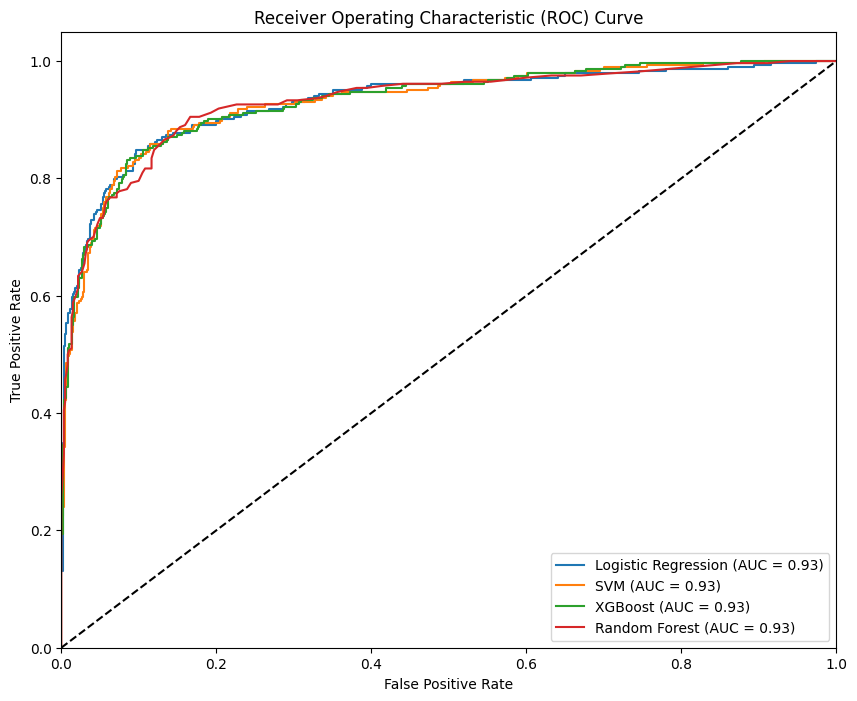

In [ ]:
# ROC Curve
plt.figure(figsize=(10, 8))
for name, model in models.items():
    # Periksa apakah model mendukung predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1] # Probabilitas kelas positif (kelas 1: Dropout)
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    else:
        print(f"Model {name} tidak mendukung predict_proba untuk ROC curve.")

plt.plot([0, 1], [0, 1], 'k--') # Plot garis diagonal random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Visual Perbandingan Model

Membandingkan performa model secara visual menggunakan metrik tertentu.

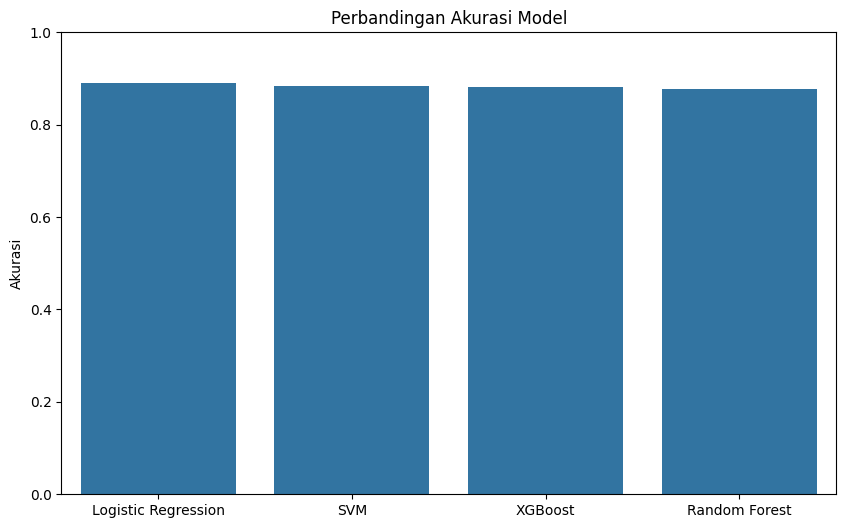

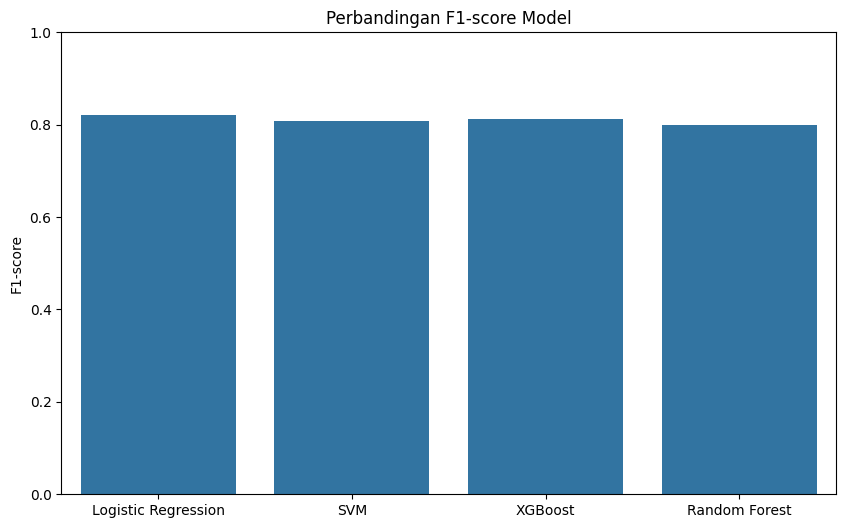

In [ ]:
# Visual Perbandingan Model (Contoh: Akurasi)
accuracy_scores = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.show()

# Anda bisa menambahkan visualisasi untuk metrik lain seperti Precision, Recall, F1-score, AUC.
# Contoh: Visualisasi F1-score
f1_scores = {name: f1_score(y_test, model.predict(X_test)) for name, model in models.items()}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("Perbandingan F1-score Model")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.show()


#### Pengaruh Semua Fitur

Menampilkan pentingnya fitur secara umum.

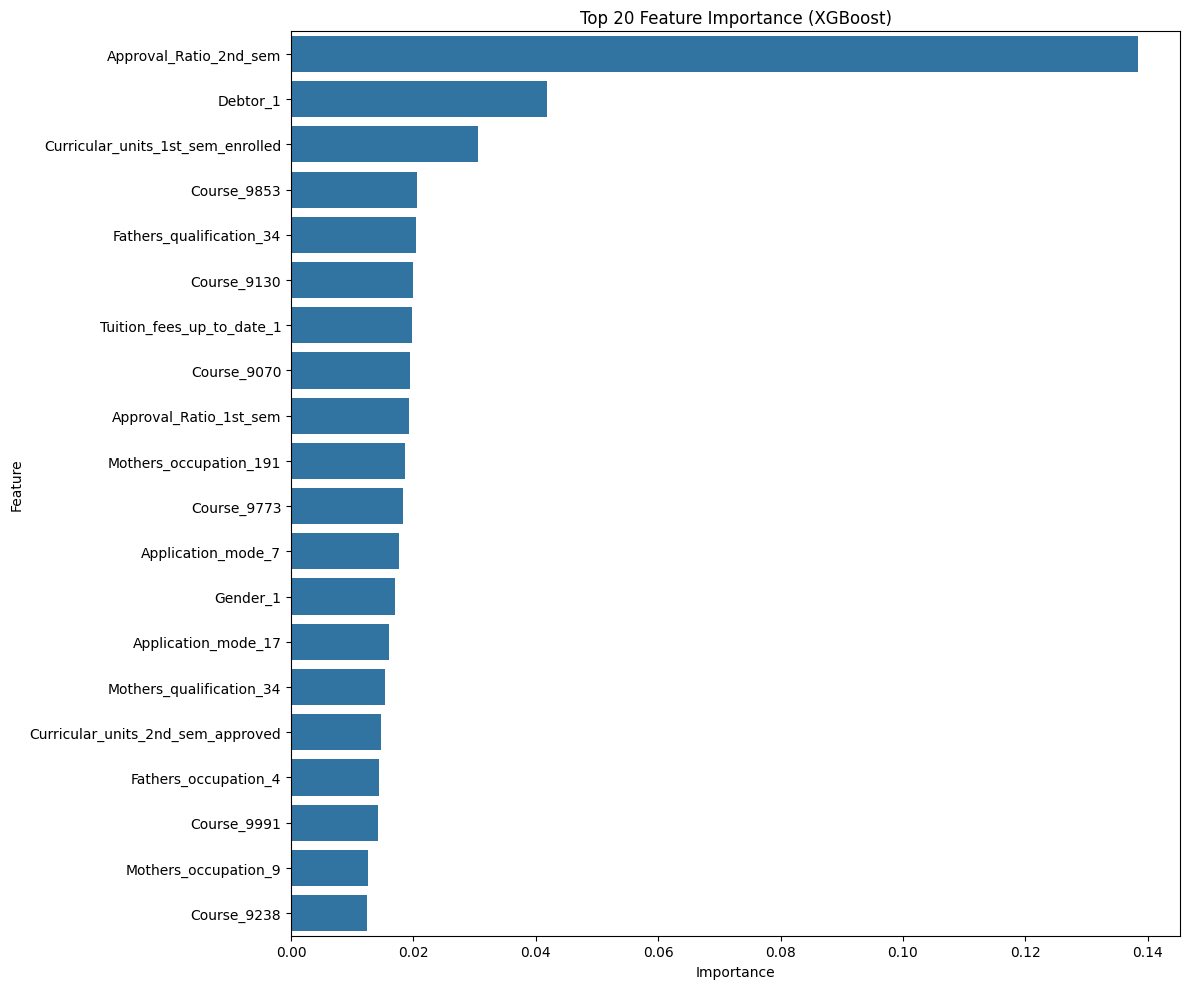

In [ ]:
# Visualisasi Feature Importance
# Menggunakan 20 fitur teratas untuk visualisasi yang lebih jelas
plt.figure(figsize=(12, 10))
sns.barplot(x=feature_importances_xgb.head(20).values, y=feature_importances_xgb.head(20).index)
plt.title("Top 20 Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Top 10 Faktor


Top 10 Faktor yang Berpengaruh terhadap Dropout (berdasarkan XGBoost):
['Approval_Ratio_2nd_sem', 'Debtor_1', 'Curricular_units_1st_sem_enrolled', 'Course_9853', 'Fathers_qualification_34', 'Course_9130', 'Tuition_fees_up_to_date_1', 'Course_9070', 'Approval_Ratio_1st_sem', 'Mothers_occupation_191']


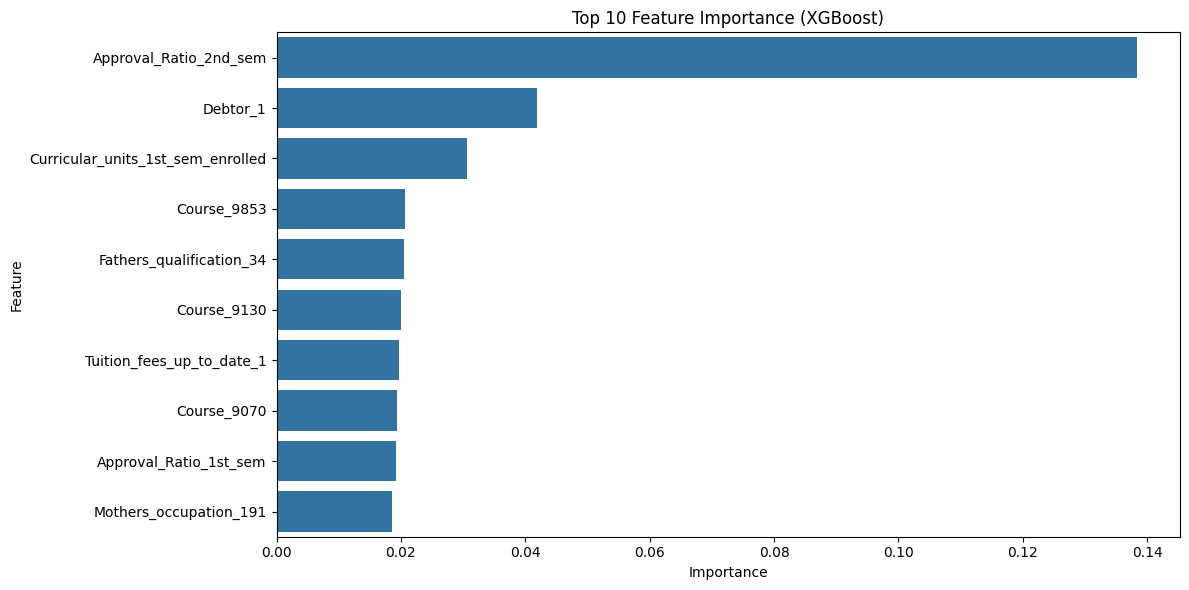

In [ ]:
# Menentukan 10 fitur teratas dari model terbaik
top_10_features = feature_importances_xgb.head(10).index.tolist()

print("\nTop 10 Faktor yang Berpengaruh terhadap Dropout (berdasarkan XGBoost):")
print(top_10_features)

# Visualisasi 10 fitur teratas
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_xgb.head(10).values, y=feature_importances_xgb.head(10).index)
plt.title("Top 10 Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Menyimpan Model

In [ ]:
import os
import joblib

# Menyimpan model terbaik
best_model = xgb_model

# Pastikan direktori 'models' ada
if not os.path.exists('models'):
    os.makedirs('models')

# Menyimpan model menggunakan joblib
joblib.dump(best_model, 'models/best_dropout_model.pkl')
print("\nModel terbaik disimpan sebagai 'models/best_dropout_model.pkl'")

# Simpan scaler yang digunakan untuk menormalkan data numerik
joblib.dump(scaler, 'models/scaler.pkl')
print("Scaler disimpan.")

# Simpan daftar kolom fitur setelah preprocessing
joblib.dump(X.columns.tolist(), 'models/columns.pkl')
print("Daftar kolom fitur disimpan.")


Model terbaik disimpan sebagai 'models/best_dropout_model.pkl'
Scaler disimpan.
Daftar kolom fitur disimpan.
